# ANALYSIS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.ensemble import IsolationForest
from gensim.summarization import keywords
from gensim.summarization import summarize
from analysis import *
from cluster_analysis import *
from dimension_reduction import *
from plotting import *
from result_print import *
from outlier_detection import *
from topic_modeling import *
from utils import save_pickle_file, load_pickle_file
from constants import PROCESSED_DATA_PATH, WORD2VEC_MODEL_PATH, BOW_MODEL_PATH

In [3]:
MAX_DISTANCE = 60
OUTLIER_DETECTION_TRESHOLD = 1.4826*3

## Load data

In [4]:
model_data = load_pickle_file(WORD2VEC_MODEL_PATH)
X = model_data['X']
model = model_data['model']

In [5]:
processed_data = load_pickle_file(PROCESSED_DATA_PATH)
job_summary_list = processed_data['job_summary_list']
documents = processed_data['documents']
lemmas = processed_data['lemmas']


## Analysis

### Cluster analysis

Cluster 1
Job ads: 10
Senior Python Developer | Pearson Frank | Tampere
Senior Python Developer - Helsinki | Pearson Frank | Helsinki
Ohjelmistokehittäjä | CGI | Helsinki
DevOps kehittäjiä | Bittium | Oulu
AI Technical Lead | Bittium Wireless Oy | Oulu
...

Cluster 2
Job ads: 36
Junior RPA Developer | Tieto Corporation | Helsinki
Full Stack Developer | CGI | Tampere
Full Stack Developer | CGI Suomi | Tampere
Senior Python in - house Developer - Helsinki | Pearson Frank | Helsinki
Data Scientist (finnish) | CGI | Helsinki
...

Cluster 3
Job ads: 1255
Testausautomaation ja RPA:n asiantuntija | Veikkaus Oy | Helsinki
Testausautomaation ja RPA:n asiantuntija | Raha-Automaattiyhdistys (Ray) | Helsinki
Junior RPA Developer | Tieto Finland Oy | Espoo
Ohjelmistokehittäjiä Helsinkiin, Tampereelle ja Turkuun | Vincit | Helsinki
Ohjelmistosuunnittelija | KTC Finland Oy | Helsinki
...

Cluster 4
Job ads: 117
DevOps Cloud Platform Developer, PHZ Full Stack Oy | Rekrytointitalli Oy | Helsinki
Data S

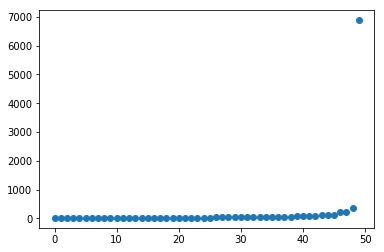

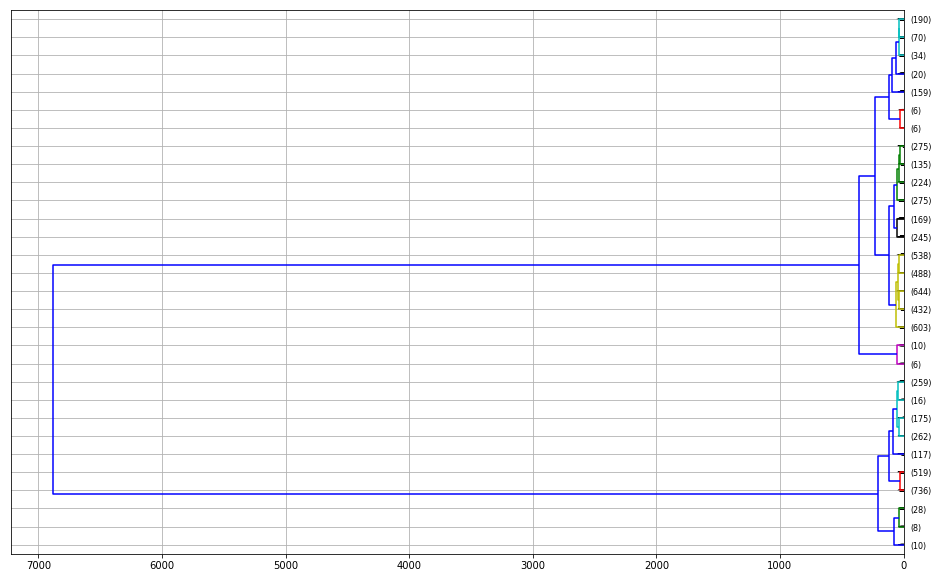

In [6]:
cluster_data = cluster_analysis(X, MAX_DISTANCE)
linkage_matrix = cluster_data['linkage_matrix']
similarities = cluster_data['similarities']
clusters = cluster_data['clusters']

display_clustering_results(linkage_matrix, clusters, job_summary_list, MAX_DISTANCE)

In [7]:
k = calculate_optimal_number_of_clusters(linkage_matrix)
k

2

### Most similar documents

In [8]:
document_index = 50
top_indices, top_similarities = calculate_most_similar_documents(document_index, similarities, 15)
display_most_similar_documents(document_index, top_indices, top_similarities, job_summary_list)

Reference document:  5G Integration engineer | NOKIA | Oulu
Most similar documents:
[('5G Integration engineer | NOKIA | Oulu', 1.0000002),
 ('Engineer, Integration | NOKIA | Oulu', 0.9919855),
 ('5G Engineer, Integration | NOKIA | Oulu', 0.9919855),
 ('Trainee, Productization | NOKIA | Oulu', 0.9742592),
 ('Integrator 5G RF | NOKIA | Oulu', 0.9734559),
 ('Technical Lead 5G RF Integration | NOKIA | Oulu', 0.9734559),
 ('5G RF Integration | NOKIA | Oulu', 0.9734559),
 ('Engineer 5G RF Integration | NOKIA | Oulu', 0.9734559),
 ('SW DEVELOPER, EMBEDDED SW | TactoTek | Oulu', 0.96795243),
 ('Senior SW Development Engineer | Mentor Graphics | Oulu', 0.96720004),
 ('Senior Software Development Engineer | Mentor Graphics | Oulu', 0.96720004),
 ('Thesis Worker, Productization Oulu | NOKIA | Oulu', 0.96617854),
 ('L1/L2 SW designer | Kyynel Oy | Oulu', 0.9659085),
 ('Embedded Software Engineer for Exafore | Toughbyte | Tampere', 0.9655561),
 ('Specialist, SoC/IP SW Development | NOKIA | Tampere

In [9]:
document_index = 0
top_indices, top_similarities = calculate_most_similar_documents(document_index, similarities, 15)
display_most_similar_documents(document_index, top_indices, top_similarities, job_summary_list)

Reference document:  Testausautomaation ja RPA:n asiantuntija | Veikkaus Oy | Helsinki
Most similar documents:
[('Testausautomaation ja RPA:n asiantuntija | Veikkaus Oy | Helsinki',
  1.0000004),
 ('DevOps- asiantuntija | Veikkaus Oy | Helsinki', 0.99540263),
 ('Testausautomaation ja RPA:n asiantuntija | Raha-Automaattiyhdistys (Ray) | '
  'Helsinki',
  0.99088025),
 ('Ohjelmistokehittäjä | Veikkaus Oy | Helsinki', 0.98851115),
 ('Kesäharjoittelija, tuotannonkehitys | Murata | Vantaa', 0.98836404),
 ('Process Development Consultant | Staria Oyj | Tampere', 0.9878476),
 ('Process Development Consultant | Staria Oyj | Helsinki', 0.9878476),
 ('Process Development Consultant, HKI / TRE | Staria Oyj | Tampere',
  0.9878217),
 ('HR Manager, HR Operations | Digia | Helsinki', 0.98761034),
 ('HR Manager, HR Operations | Digia Oyj | Helsinki', 0.98761034),
 ('Ohjelmistokehittäjä (Senior) | Veikkaus Oy | Helsinki', 0.9875004),
 ('Atlassian-konsultti | Avoset Oy | Helsinki', 0.98737234),
 ('(Jun

### PCA

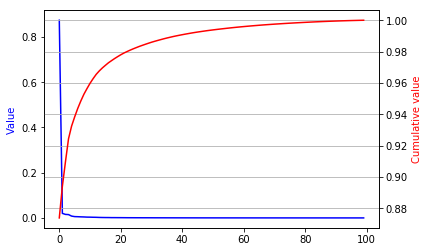

In [10]:
pcs, pca_model = calculate_principal_components(X)
plot_value_and_cumulative_value(pca_model.explained_variance_ratio_)

### MDS

In [11]:
## Works but takes lot of time
# distances = 1 - similarities
# x,y = calculate_mds_vectors(distances)
# plot_mds(x,y, clusters, job_summary_list)

### Outlier detection

In [12]:
rng = np.random.RandomState(42)
clf = IsolationForest(random_state=rng)
clf.fit(X)
scores = clf.decision_function(X)

/home/ossi/Repos/Personal/job_advertisement_analysis/venv/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/ossi/Repos/Personal/job_advertisement_analysis/venv/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Number of outliers detected: 115 (1.73 %)
Outliers:
Senior Python, React Developer | Pearson Frank | Helsinki
Full - Stack Developer - Tampere | Pearson Frank | Turku
Senior Python Developer | Pearson Frank | Tampere
Back End / Front End / Cloud Services Developers | Sasken Finland Oy | Tampere
Senior Python in - house Developer - Helsinki | Pearson Frank | Helsinki
Senior Python Developer - Helsinki | Pearson Frank | Helsinki
Part time trainee in Cloud RAN SW | NOKIA | Espoo
Senior Developer | Nigel Frank International Limited | Helsinki
.NET Ohjelmistokehittäjä | Nigel Frank International Limited | Vantaa
Tohtorikoulutettavia ja tutkijatohtoreita (Finnish Center fo... | Aalto-yliopisto | Espoo
Software developer | Codership | Helsinki
Cloud Architect (AWS + VR/AR) | Finitec | Helsinki
Senior Consultant - Helsinki | Pearson Frank | Helsinki
Pihatyöntekijä | Ai-to Foods Oy | Vantaa
Palveluneuvoja | Lumo Energia | Helsinki
Lehtori (AI), Pitkäkankaan koulu | Oulun kaupunki | Oulu
Lehtori

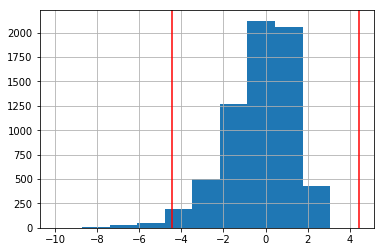

In [13]:
outlier_detection(scores, OUTLIER_DETECTION_TRESHOLD, job_summary_list)

### Keyword extraction, summarization, tagging

In [14]:
document_index = 1
test_document = documents[document_index]
test_lemmas = lemmas[document_index]
print(test_document, '\n')

We are looking for Insurance Professional´s. You will meet our customers’ changing needs and offer them the best possible service.

In today’s world, change is the one thing you can count on. But whatever the future brings, our customers remain at the heart of everything we do.

That’s where you come in. Working with dedicated colleagues in an exciting, fast-paced environment, you’ll help meet our customers’ changing needs.

We aim to be courageous and explorative in our approach to innovating better ways of delivering banking services – anytime, anywhere. This means you’ll have many opportunities to learn and grow as you build your career with us. Will you help us lead the way in creating great customer experiences?

Your future responsibilities
You will join Nordea Life´s Customer Services unit. Nordea Life is a subsidiary to Nordea. We offer life insurance solutions to private and corporate customers. Our mission is to integrate our products with those of Nordea bank and make life i

In [15]:
keywords = keywords(' '.join(test_lemmas), ratio=0.05)
print(f'Keywords:\n{keywords}')

Keywords:
customer
position
positive
nordea
great
service
way
offer
job
learn
learning


In [16]:
summary = summarize(test_document, split=True, ratio = 0.1)
for s in summary: print(s + '\n')

You will meet our customers’ changing needs and offer them the best possible service.

Working with dedicated colleagues in an exciting, fast-paced environment, you’ll help meet our customers’ changing needs.

We offer life insurance solutions to private and corporate customers.

Our mission is to integrate our products with those of Nordea bank and make life insurances more accessible for the customers.

You have experience in customer service / claims handling processes



## Semantic search

In [17]:
query = ['data','science']
query_vector = calculate_document_vector(query, model)
indices, scores = search_documents_by_relevance(np.array([query_vector]), X, number_threshold=10)
most_relevant_job_ads = [job_summary_list[i] for i in indices]

In [18]:
for ad, score in zip(most_relevant_job_ads, scores):
    print(f'{ad}: {score}')

Lead Data Scientist | Harnham | Helsinki: 0.6665258407592773
Data Scientist :: Finland | crown global solution | Helsinki: 0.6613986492156982
Senior Data Engineer (Finnish Speaking) | Hewitt Britton | Helsinki: 0.6603383421897888
Data Scientist | Hirexa | Helsinki: 0.6559022665023804
Data Engineer | Lionbridge Technologies | Tampere: 0.6397413015365601
Data Engineer | Harnham | Helsinki: 0.6325775980949402
Software/Data Engineer | Lionbridge Technologies | Tampere: 0.6324383020401001
Data Scientist | Best Player Consulting | Helsinki: 0.6314491033554077
Data Scientist | Harnham | Helsinki: 0.6302502751350403
Data Engineer, Fiskars Data & Analytics team | Fiskars Group | Helsinki: 0.6279071569442749
